In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

# Data Explore

In [2]:
# Importing the EDA class
from scripts.eda import EDA
# Importing the DataCleaner class
from scripts.data_cleaning import DataCleaner

## Explore Fraud_Data.csv

#### Load Fraud_Data.csv

In [3]:
# Initialize the Fraud EDA object
fraud_eda = EDA(input_path="../data/raw")

# Load dataset
print("Loading Fraud_Data.csv...")
fraud_data = fraud_eda.load_data("Fraud_Data.csv")
fraud_data.head()

2025-02-12 09:16:49,381 - INFO - Loading data from ../data/raw/Fraud_Data.csv
2025-02-12 09:16:49,525 - INFO - Data loaded successfully.


Loading Fraud_Data.csv...


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


#### Fraud_data Overview
Overview of the dataset including the shape, number of duplicate rows, and column information.

In [4]:
fraud_overview = fraud_eda.overview()

2025-02-12 09:16:49,535 - INFO - Dataset Overview:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


2025-02-12 09:16:49,611 - INFO - Shape: (151112, 11)
2025-02-12 09:16:49,611 - INFO - Number of duplicate rows: 0


### Analysis

**Dataset Shape**: The dataset contains 151,112 rows and 11 columns.

**Duplicates**: There are no duplicate rows in the dataset.

**Data Types**: The dataset includes a mix of data types:
- 4 columns with `int64`
- 1 column with `float64`
- 6 columns with `object`

### Suggestions

**Data Types**: Consider converting `signup_time` and `purchase_time` columns to datetime objects for better time-based operations.

#### Data Cleaning
Convert Data Types for Fraud Data

In [5]:
# Initialize DataCleaner
fraud_cleaner = DataCleaner(input_path="../data/raw", output_path="../data/preprocessed")
fraud_data = fraud_cleaner.convert_data_types(fraud_data, columns=["signup_time", "purchase_time"], dtype="datetime")

2025-02-12 09:16:49,633 - INFO - Converted column signup_time to datetime format.
2025-02-12 09:16:49,651 - INFO - Converted column purchase_time to datetime format.


#### missing value analysis

In [6]:
fraud_missing = fraud_eda.missing_values_analysis()

2025-02-12 09:16:49,668 - INFO - No missing values detected.


#### Summary Statitistics

In [7]:
fraud_summary = fraud_eda.summary_statistics(fraud_data)

2025-02-12 09:16:49,671 - INFO - Summary Statistics:
2025-02-12 09:16:49,737 - INFO -                    count  unique            top   freq  \
user_id         151112.0     NaN            NaN    NaN   
signup_time       151112     NaN            NaN    NaN   
purchase_time     151112     NaN            NaN    NaN   
purchase_value  151112.0     NaN            NaN    NaN   
device_id         151112  137956  CQTUVBYIWWWBC     20   
source            151112       3            SEO  60615   
browser           151112       5         Chrome  61432   
sex               151112       2              M  88293   
age             151112.0     NaN            NaN    NaN   
ip_address      151112.0     NaN            NaN    NaN   
class           151112.0     NaN            NaN    NaN   

                                         mean                  min  \
user_id                          200171.04097                  2.0   
signup_time     2015-04-20 00:56:09.511329280  2015-01-01 00:00:42   
purchas

**Summary Statistics:**
- **User ID:** 151,112 unique user IDs with a mean of 200,171.04 and a standard deviation of 115,369.29.
- **Signup Time:** Ranges from 2015-01-01 to 2015-08-18.
- **Purchase Time:** Ranges from 2015-01-01 to 2015-12-16.
- **Purchase Value:** Ranges from 9 to 154, with a mean of 36.94 and a standard deviation of 18.32.
- **Device ID:** 137,956 unique device IDs, with the most frequent device ID appearing 20 times.
- **Source:** Most common source is SEO, appearing 60,615 times.
- **Browser:** Most common browser is Chrome, appearing 61,432 times.
- **Sex:** 88,293 males and 62,819 females.
- **Age:** Ranges from 18 to 76, with a mean of 33.14 and a standard deviation of 8.62.
- **IP Address:** Ranges from 52,093.50 to 4,294,850,499.68, with a mean of 2,152,145,330.96 and a standard deviation of 1,248,497,030.10.
- **Class:** 9.36% fraudulent transactions.

**Suggestions:**
- **EDA:**
    - **Time-Based Analysis:** Analyze signup and purchase times for patterns or anomalies.
    - **Device and Browser Analysis:** Investigate frequent device IDs and browsers for user behavior and potential fraud patterns.
    - **Demographic Analysis:** Analyze age and sex distribution for demographic trends in fraudulent transactions.
    - **IP Address Analysis:** Perform geolocation analysis on IP addresses to detect suspicious activity from specific regions.
- **Encoding:**
    - **Categorical Encoding:** Encode categorical columns (source, browser, sex) using one-hot or label encoding.

In [8]:
# Save cleaned data
fraud_cleaner.save_data(fraud_data, "Fraud_Data_cleaned.csv")

2025-02-12 09:16:49,742 - INFO - Saving cleaned data to ../data/preprocessed/Fraud_Data_cleaned.csv


## Explore IpAddress_to_Country

#### Load IpAddress_to_Country.csv

In [9]:
# Initialize ip EDA object
ip_eda = EDA(input_path="../data/raw")

print("Loading IpAddress_to_Country.csv...")
ip_data = ip_eda.load_data("IpAddress_to_Country.csv")
ip_data.head()

2025-02-12 09:16:50,257 - INFO - Loading data from ../data/raw/IpAddress_to_Country.csv
2025-02-12 09:16:50,284 - INFO - Data loaded successfully.


Loading IpAddress_to_Country.csv...


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### IpAddress_to_Country Overview
Overview of the dataset including the shape, number of duplicate rows, and column information.

In [10]:
ip_data_overview = ip_eda.overview()

2025-02-12 09:16:50,289 - INFO - Dataset Overview:
2025-02-12 09:16:50,307 - INFO - Shape: (138846, 3)
2025-02-12 09:16:50,307 - INFO - Number of duplicate rows: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Analysis

**Dataset Overview:**
- **Shape:** The dataset contains 138,846 rows and 3 columns.
- **Duplicates:** There are no duplicate rows in the dataset.
- **Data Types:** 
    - `lower_bound_ip_address`: float64
    - `upper_bound_ip_address`: int64
    - `country`: object

### Suggestions

- **Data Types:** Consider converting `lower_bound_ip_address` to `int64` for consistency with `upper_bound_ip_address`.

#### Data Cleaning
Convert data types for IP address columns

In [11]:
ip_cleaner = DataCleaner(input_path="../data/raw", output_path="../data/preprocessed")
ip_data = ip_cleaner.convert_data_types(
    ip_data, 
    columns=["lower_bound_ip_address", "upper_bound_ip_address"], 
    dtype="int"
)

2025-02-12 09:16:50,312 - INFO - Converted column lower_bound_ip_address to integer format.
2025-02-12 09:16:50,313 - INFO - Converted column upper_bound_ip_address to integer format.


#### missing value analysis

In [12]:
ip_missing = ip_eda.missing_values_analysis()

2025-02-12 09:16:50,319 - INFO - No missing values detected.


#### Summary Statitistics

In [13]:
ip_summary = ip_eda.summary_statistics(ip_data)

2025-02-12 09:16:50,323 - INFO - Summary Statistics:
2025-02-12 09:16:50,333 - INFO -                            count unique            top   freq  \
lower_bound_ip_address  138846.0    NaN            NaN    NaN   
upper_bound_ip_address  138846.0    NaN            NaN    NaN   
country                   138846    235  United States  46868   

                                     mean               std         min  \
lower_bound_ip_address  2724531562.515996   897521519.71161  16777216.0   
upper_bound_ip_address  2724557062.218357  897497915.460137  16777471.0   
country                               NaN               NaN         NaN   

                                 25%           50%           75%           max  
lower_bound_ip_address  1919930368.0  3230887296.0  3350465280.0  3758096128.0  
upper_bound_ip_address  1920008191.0  3230887551.0  3350465919.0  3758096383.0  
country                          NaN           NaN           NaN           NaN  


### Summary Analysis
- **country:**
    - **Count:** 138,846
    - **Unique:** 235
    - **Top:** United States
    - **Frequency:** 46,868

### Suggestions
- **Country Analysis:** The most frequent country is the United States, appearing 46,868 times. Consider analyzing the distribution of other countries to identify any patterns or anomalies.
- **IP Range Analysis:** Investigate the IP ranges to detect any suspicious or unusual patterns that could indicate fraudulent activities.

In [14]:
# Save cleaned IP address data
ip_cleaner.save_data(ip_data, "IpAddress_to_Country_cleaned.csv")

2025-02-12 09:16:50,337 - INFO - Saving cleaned data to ../data/preprocessed/IpAddress_to_Country_cleaned.csv


## Explore creditcard.csv

#### Load creditcard.csv

In [15]:
# Initialize ip EDA object
credit_eda = EDA(input_path="../data/raw")

print("Loading creditcard.csv...")
credit_data = credit_eda.load_data("creditcard.csv")
credit_data.head()

2025-02-12 09:16:50,466 - INFO - Loading data from ../data/raw/creditcard.csv


Loading creditcard.csv...


2025-02-12 09:16:51,258 - INFO - Data loaded successfully.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### creditcard Overview
Overview of the dataset including the shape, number of duplicate rows, and column information.

In [16]:
creadit_overview = credit_eda.overview()

2025-02-12 09:16:51,267 - INFO - Dataset Overview:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2025-02-12 09:16:51,544 - INFO - Shape: (284807, 31)
2025-02-12 09:16:51,545 - INFO - Number of duplicate rows: 1081


### Summary Analysis

**Dataset Overview:**
- **Shape:** The dataset contains 284,807 rows and 31 columns.
- **Data Types:** 
    - 30 columns with `float64`
    - 1 column with `int64`
- **Duplicates:** There are 1,081 duplicate rows in the dataset.

### Suggestions

- **Duplicate Removal:** Remove the 1,081 duplicate rows to ensure data integrity and avoid redundancy.
- **Data Types:** Ensure that the data types are appropriate for each column. Since all columns are either `float64` or `int64`, no immediate changes are necessary unless specific columns require conversion for analysis purposes.
- **Further Analysis:**
    - **Class Distribution:** Analyze the distribution of the `Class` column to understand the proportion of fraudulent transactions.
    - **Feature Importance:** Perform feature importance analysis to identify which features contribute most to the prediction of fraudulent transactions.
    - **Correlation Analysis:** Conduct a correlation analysis to identify any strong relationships between features.
    - **Time-Based Analysis:** Analyze the `Time` column to detect any temporal patterns in fraudulent transactions.
- **Data Cleaning:** After removing duplicates, ensure that there are no missing values or outliers that could affect the analysis.

#### Data Cleaning
Remove duplicate rows

In [17]:
# Initialize DataCleaner
credit_cleaner = DataCleaner(input_path="../data/raw", output_path="../data/preprocessed")
creadit_data = credit_cleaner.remove_duplicates(credit_data)

2025-02-12 09:16:51,813 - INFO - Removed 1081 duplicate rows.


#### missing value analysis

In [18]:
credit_missing = credit_eda.missing_values_analysis()

2025-02-12 09:16:51,826 - INFO - No missing values detected.


#### Summary Statitistics

In [19]:
credit_summary = credit_eda.summary_statistics(credit_data)

2025-02-12 09:16:51,830 - INFO - Summary Statistics:
2025-02-12 09:16:52,014 - INFO -            count          mean           std         min           25%  \
Time    283726.0  94811.077600  47481.047891    0.000000  54204.750000   
V1      283726.0      0.005917      1.948026  -56.407510     -0.915951   
V2      283726.0     -0.004135      1.646703  -72.715728     -0.600321   
V3      283726.0      0.001613      1.508682  -48.325589     -0.889682   
V4      283726.0     -0.002966      1.414184   -5.683171     -0.850134   
V5      283726.0      0.001828      1.377008 -113.743307     -0.689830   
V6      283726.0     -0.001139      1.331931  -26.160506     -0.769031   
V7      283726.0      0.001801      1.227664  -43.557242     -0.552509   
V8      283726.0     -0.000854      1.179054  -73.216718     -0.208828   
V9      283726.0     -0.001596      1.095492  -13.434066     -0.644221   
V10     283726.0     -0.001441      1.076407  -24.588262     -0.535578   
V11     283726.0      0.00

### Summary Analysis

**Dataset Overview:**
- **Shape:** The dataset contains 283,726 rows and 31 columns.
- **Data Types:** 
    - 30 columns with `float64`
    - 1 column with `int64`
- **Duplicates:** There are no duplicate rows in the dataset.

**Summary Statistics:**
- **Time:** Ranges from 0 to 172,792 with a mean of 94,811.08 and a standard deviation of 47,481.05.
- **V1 to V28:** Each feature has a mean close to 0, indicating that the data is centered around 0. The standard deviations vary, with some features having large ranges (e.g., V1 ranges from -56.41 to 2.45).
- **Amount:** Ranges from 0 to 25,691.16 with a mean of 88.47 and a standard deviation of 250.40.
- **Class:** The target variable is highly imbalanced with a mean of 0.001667, indicating a very small proportion of fraudulent transactions.

In [20]:
# save cleaned credit card data
credit_cleaner.save_data(credit_data, "creditcard_cleaned.csv")

2025-02-12 09:16:52,019 - INFO - Saving cleaned data to ../data/preprocessed/creditcard_cleaned.csv


# EDA analysis

## Fraud EDA analysis

### Univariate Analysis (Fraud_Data.csv)
In this step, we analyze the distributions of numerical features and class distributions. 
This helps us understand the dataset's structure and identify potential outliers or imbalances.


In [21]:
# Import necessary modules
from scripts.data_visualizer import DataVisualizer
import pandas as pd

# Load the dataset
fraud_data = pd.read_csv('../data/preprocessed/Fraud_Data_cleaned.csv')

# Initialize columns
numerical_columns = ['purchase_value', 'age']
categorical_columns = ['source', 'browser', 'sex']
target_column = 'class'

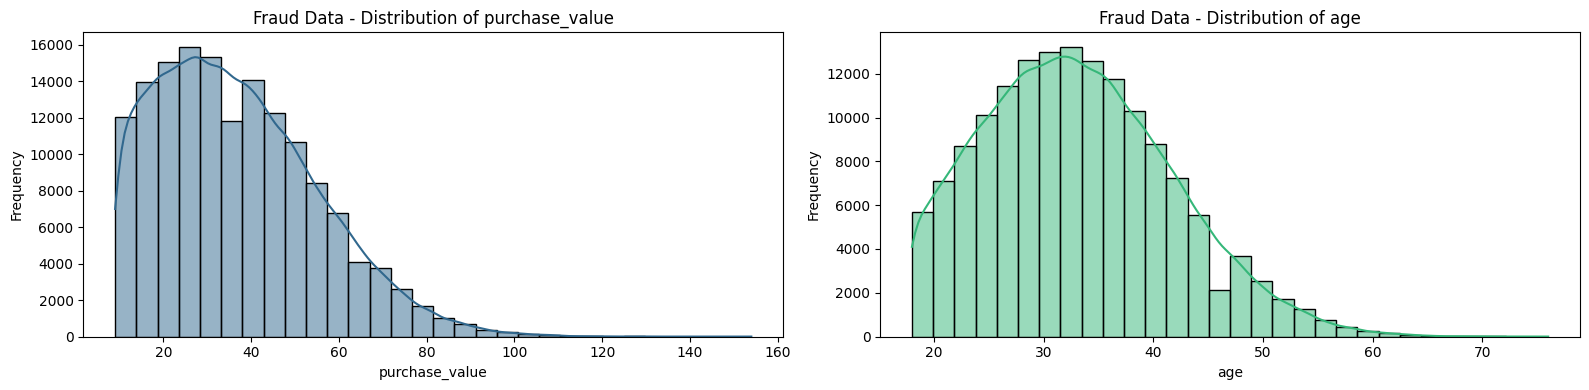

In [22]:
# Univariate Analysis - Numerical Features
DataVisualizer.plot_numerical_distribution(fraud_data, numerical_columns, title_prefix="Fraud Data - ")

1. Purchase Value Distribution
    - **Analysis:** Most transactions have lower purchase values (20-40), with fewer high-value transactions.
    - **Recommendations:**
      - Investigate high purchase values as they might correlate with fraud cases.
      - Apply scaling (e.g., Min-Max or log transformation) for this feature before modeling, as it has a wide range.

2. Age Distribution
    - **Analysis:** The majority of users are between 20-50 years old, peaking at 30-40 years.
    - **Recommendations:**
      - Consider creating age bins (e.g., <20, 20-30, 30-40, etc.) for categorical analysis.
      - Investigate whether certain age groups are more prone to fraudulent behavior.

2025-02-12 09:16:57,613 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:16:57,645 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


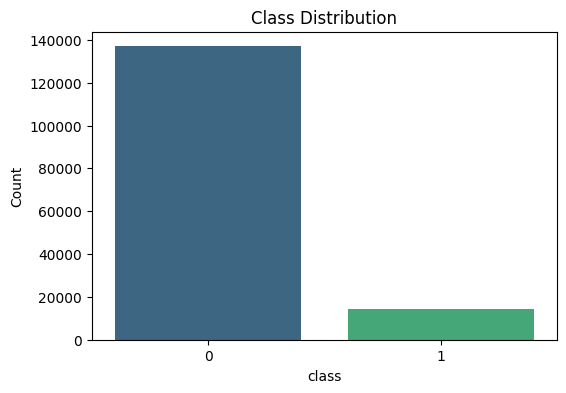

In [23]:
# Univariate Analysis - Class Distribution
DataVisualizer.plot_class_distribution(fraud_data, target_column)

### Class Distribution

**Analysis:** Significant class imbalance, with non-fraud cases (Class 0) dominating.

**Recommendations:**
- Address the imbalance during model training using techniques such as:
   - Oversampling (e.g., SMOTE)
   - Undersampling
   - Class-weight adjustments in the model

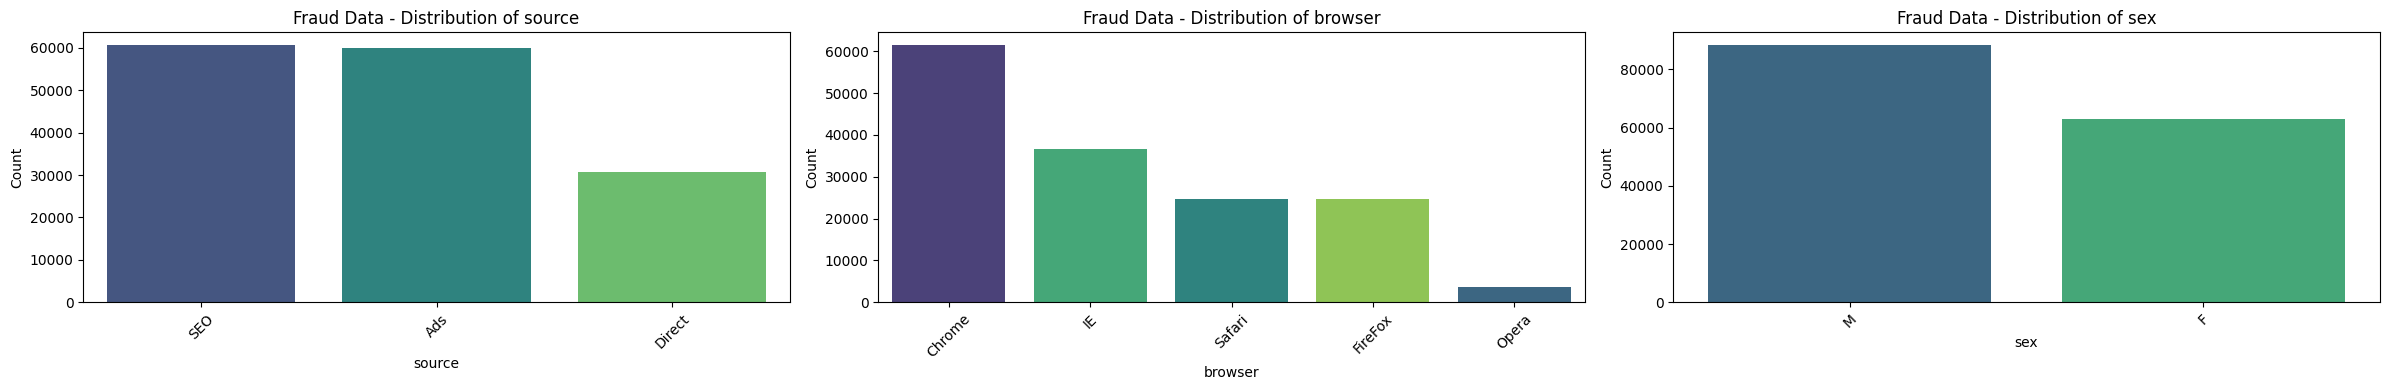

In [24]:
# Univariate Analysis - Categorical Features
DataVisualizer.plot_categorical_distribution(fraud_data, categorical_columns, title_prefix="Fraud Data - ")


1. Source Distribution
    - **Analysis:** Most users are from SEO and Ads, with fewer from Direct.
    - **Recommendations:**
      - Investigate whether certain sources are more associated with fraud cases.
      - Use one-hot encoding for the source feature before modeling.

2. Browser Distribution
    - **Analysis:** Chrome is the most used browser, followed by IE, Safari, and Firefox.
    - **Recommendations:**
      - Analyze the relationship between browsers and fraudulent transactions.
      - Encode the browser feature (e.g., one-hot encoding).

3. Sex Distribution
    - **Analysis:** More males than females in the dataset.
    - **Recommendations:**
      - Investigate whether gender has a significant correlation with fraudulent behavior.

### Bivariate Analysis (Fraud_Data.csv)
In this step, we explore relationships between features and the target variable (class). The objective is to identify patterns or correlations that might help in predicting fraud.

**Key tasks:**
- Analyze numerical features (purchase_value, age) against class.
- Analyze categorical features (source, browser, sex) against class.
- Create a correlation heatmap for numerical features.


2025-02-12 09:16:58,343 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:16:58,378 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:16:58,462 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:16:58,496 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


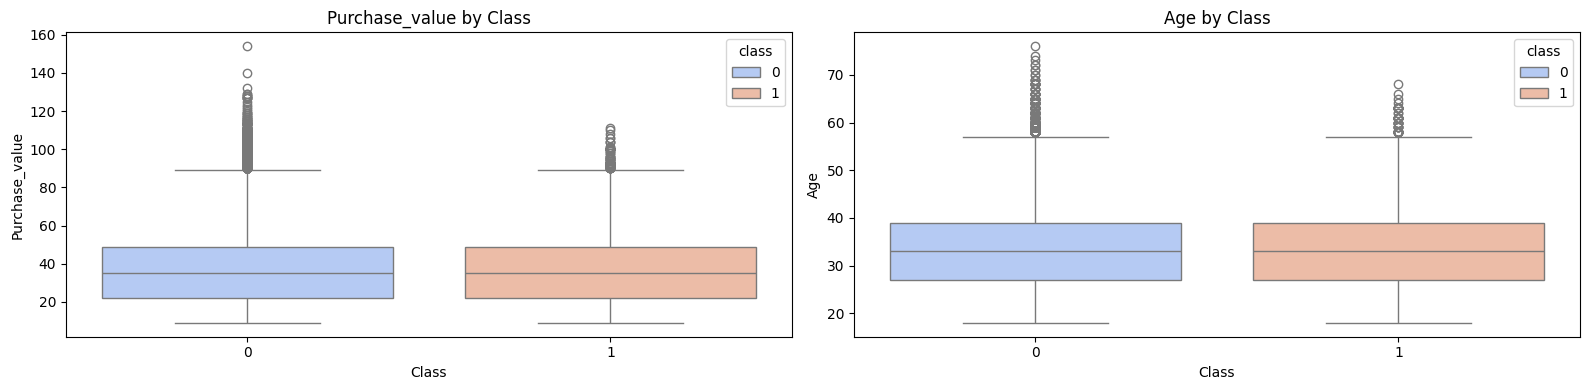

In [25]:
from scripts.data_visualizer import DataVisualizer
# Bivariate Analysis - Numerical Features by Class
DataVisualizer.plot_boxplots_by_class(fraud_data, numerical_columns, target_column)

### Purchase Value by Class

**Analysis:**
- Similar distributions between fraud (Class 1) and non-fraud (Class 0) transactions.
- Presence of high purchase value outliers in both classes.

**Recommendations:**
- Investigate high purchase values further to identify potential anomalies.
- Use scaling techniques (e.g., log transformation or Min-Max scaling) to reduce the impact of outliers on the model.

### Age by Class

**Analysis:**
- Age distributions are similar across fraud and non-fraud cases.
- Older age outliers exist in both classes.

**Recommendations:**
- Investigate older age outliers to understand if they’re valid or potential anomalies.
- Age may not be a strong fraud indicator by itself but could interact with other features.

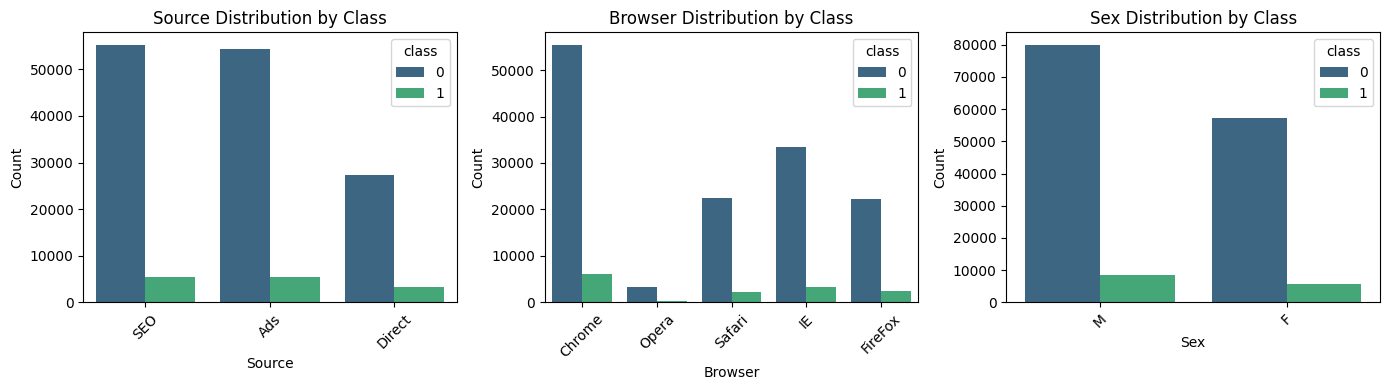

In [26]:
# Bivariate Analysis - Categorical Features by Class
DataVisualizer.plot_categorical_by_class(fraud_data, categorical_columns, target_column)

### Source Distribution
**Analysis:**
- Most transactions originate from "SEO" and "Ads."
- Fraudulent transactions are slightly higher in "Ads."

**Recommendations:**
- Focus on transactions originating from "Ads" in further analysis and modeling.
- Use one-hot encoding for the source feature to retain its categorical nature.

### Browser Distribution
**Analysis:**
- "Chrome" has the highest number of transactions, followed by other browsers.
- Fraud rates are low across all browsers.

**Recommendations:**
- Analyze browser usage further for fraud trends, especially for "Opera" with lower usage.
- Use one-hot encoding for the browser feature.

### Sex Distribution
**Analysis:**
- More males (M) than females (F) in the dataset.
- Fraudulent transactions are slightly higher for females.

**Recommendations:**
- Include sex

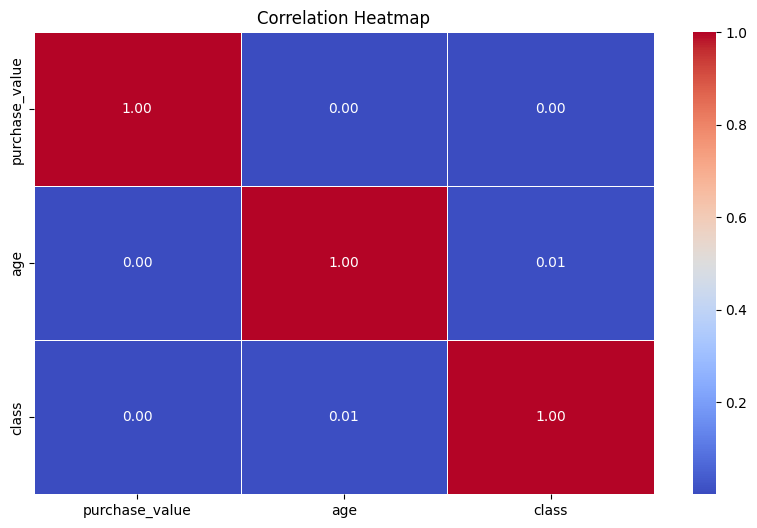

In [27]:
# Bivariate Analysis - Correlation Heatmap
DataVisualizer.plot_correlation_heatmap(fraud_data, numerical_columns + [target_column])

### Correlation Heatmap

**Analysis:**
- No strong linear correlation between `purchase_value`, `age`, and `class`.
- Indicates that fraud detection relies on non-linear relationships and interactions.

**Recommendations:**
- Proceed to feature engineering to create derived features.
- Use advanced machine learning models capable of capturing complex patterns (e.g., tree-based models like XGBoost).

### Time-Based Analysis
In this step, we create time-based features (`hour_of_day`, `day_of_week`) from the `purchase_time` column. These features help identify temporal patterns that could influence fraudulent activity.

In [28]:
from scripts.feature_engineering import FeatureEngineer
import pandas as pd

# Load the dataset
fraud_data = pd.read_csv('../data/preprocessed/Fraud_Data_cleaned.csv')

# Convert purchase_time to datetime if not already done
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Create time-based features
fraud_data = FeatureEngineer.create_time_features(fraud_data, time_column='purchase_time')

# save the updated dataset
fraud_data.to_csv('../data/preprocessed/Fraud_Data_cleaned.csv', index=False)

# Display the updated dataset with time-based features
print(fraud_data[['purchase_time', 'hour_of_day', 'day_of_week']].head())


2025-02-12 09:16:59,371 - INFO - Time-based features created: 'hour_of_day', 'day_of_week' from purchase_time.


        purchase_time  hour_of_day  day_of_week
0 2015-04-18 02:47:11            2            5
1 2015-06-08 01:38:54            1            0
2 2015-01-01 18:52:45           18            3
3 2015-05-04 13:54:50           13            0
4 2015-09-09 18:40:53           18            2


### Observations

**hour_of_day:**
- Extracted successfully, showing the hour of the day when transactions occurred.
- Example: The first transaction occurred at 2:47 AM (hour_of_day = 2).

**day_of_week:**
- Extracted successfully, where:
    - 0 = Monday, 1 = Tuesday, ..., 6 = Sunday.
- Example: The first transaction occurred on a Saturday (day_of_week = 5).

### Recommendations

**Perform temporal analysis:**
- Analyze transaction patterns by `hour_of_day` and `day_of_week` to identify peaks in fraudulent activity.
- Plot distributions to understand these patterns visually.

**Incorporate `hour_of_day` and `day_of_week` as features in the fraud detection model:**
- These features can capture temporal patterns that may help distinguish fraud from non-fraud transactions.






---

### Analyze Temporal Patterns
In this step, we explore the distributions of transactions over `hour_of_day` and `day_of_week`. This helps identify when fraudulent activities are more likely to occur.

2025-02-12 09:16:59,885 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:16:59,918 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


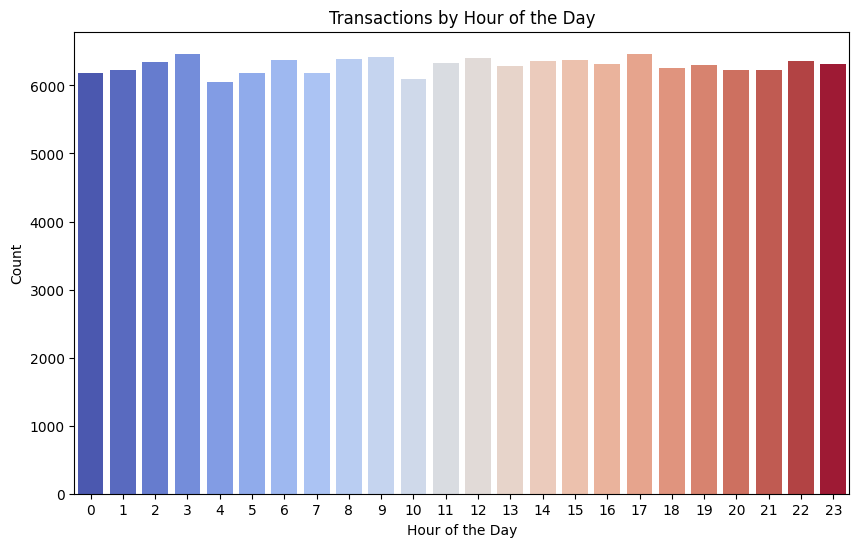

2025-02-12 09:17:00,076 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:17:00,142 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


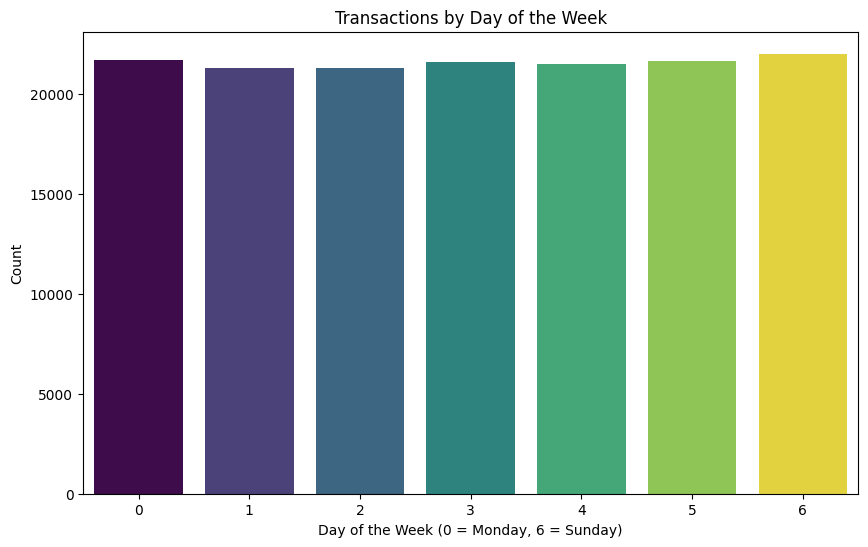

In [29]:
# Analyze temporal patterns
time_columns = ['hour_of_day', 'day_of_week']
DataVisualizer.plot_temporal_patterns(fraud_data, time_columns)

### Purchase Patterns by Hour of the Day

**Observation:**
- Consistent purchase activity across all hours, with no significant peaks or drops.

**Implication:**
- Indicates stable purchasing behavior throughout the day.

**Recommendations:**
- Time of day may not be a strong predictor for fraud but should still be included in the model to capture any subtle patterns.
- No additional action needed for `hour_of_day` beyond encoding it as a categorical feature.

### Purchase Patterns by Day of the Week

**Observation:**
- Relatively consistent purchase activity across all days, with slightly higher purchases on Monday and Sunday.
- Could indicate weekend shopping trends or the start-of-workweek effect.

**Implication:**
- Slight variations by day of the week could contribute to distinguishing fraud patterns.

**Recommendations:**
- Include `day_of_week` as a feature.
- Consider encoding it as a cyclical feature (e.g., sine/cosine transformation) to reflect the natural order of days.
---

### Transaction Frequency and Velocity Features  
These features help analyze user behavior over time.  
- **Transaction Count**: Total number of transactions made by a user.  
- **Transaction Velocity**: Number of transactions per day since the first recorded transaction.  
These features can help detect users who exhibit abnormally high activity in a short time, which may indicate fraudulent behavior.

In [30]:
# Create transaction frequency and velocity features
fraud_data = FeatureEngineer.create_transaction_features(
    fraud_data, user_id_column='user_id', transaction_time_column='purchase_time'
)

# Display the updated dataset with new features
print(fraud_data[['user_id', 'transaction_count', 'days_since_first_transaction', 'transaction_velocity']].head())


2025-02-12 09:17:07,384 - INFO - Transaction frequency and velocity features created.


   user_id  transaction_count  days_since_first_transaction  \
0    22058                  1                             1   
1   333320                  1                             1   
2     1359                  1                             1   
3   150084                  1                             1   
4   221365                  1                             1   

   transaction_velocity  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  


### Transaction Feature Visualization  
To better understand user behavior, we analyze:  
1. **Transaction Count Distribution** – Identifies how frequently users transact.  
2. **Transaction Velocity Distribution** – Highlights users making rapid transactions.  
3. **Top Users by Transaction Count** – Detects users with the highest number of transactions.  


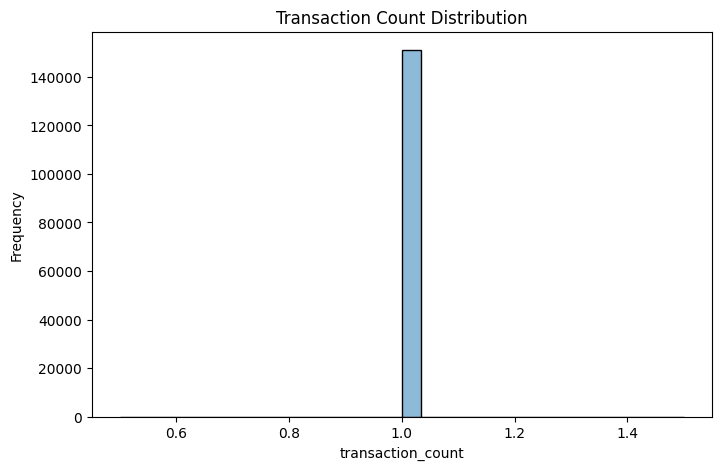

In [31]:
# Plot transaction count distribution
DataVisualizer.plot_transaction_distribution(fraud_data, 'transaction_count', 'Transaction Count Distribution')

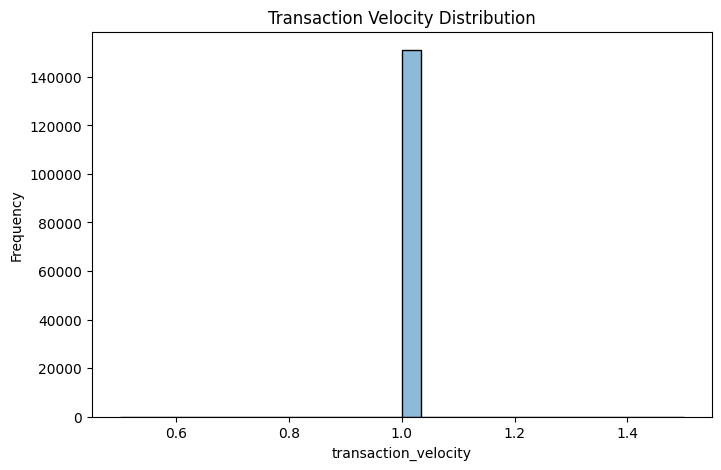

2025-02-12 09:17:07,596 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 09:17:07,598 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


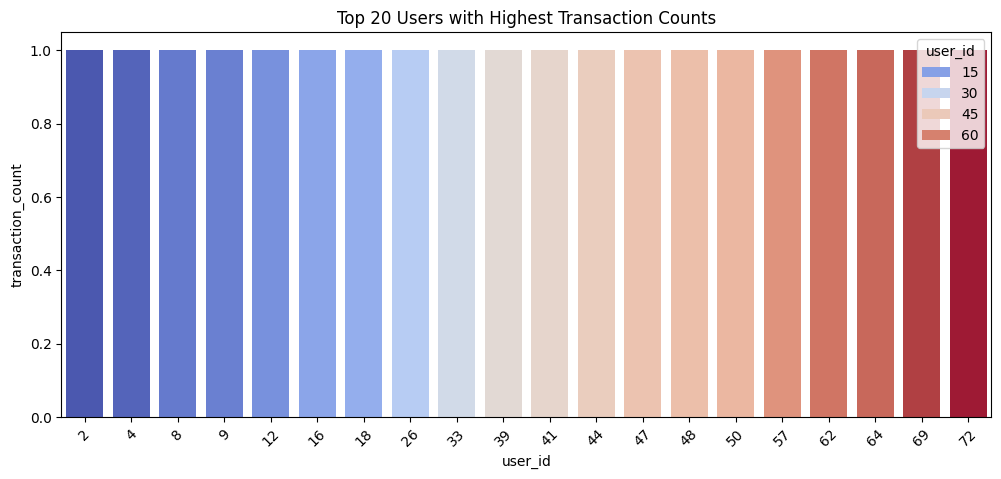

In [32]:

from scripts.data_visualizer import DataVisualizer
# Plot transaction velocity distribution
DataVisualizer.plot_transaction_distribution(fraud_data, 'transaction_velocity', 'Transaction Velocity Distribution')

# Identify top users with the highest transaction counts
DataVisualizer.plot_top_users_by_transactions(fraud_data, user_id_column='user_id', transaction_column='transaction_count', top_n=20)

### Analysis of Transaction Features Output

**Observations:**
- The highest `transaction_count` is 1, indicating each user has only one transaction.
- The highest `transaction_velocity` is also 1, meaning no user has more than one transaction per day.
- This implies our dataset does not contain users who have made multiple purchases.

**Implications:**
- Since each user appears only once, `transaction_count` and `transaction_velocity` are not useful as predictive features.
- Fraud detection in this dataset is likely based on other features such as purchase behavior, source, browser, and geolocation.

**Recommendations:**
- Drop `transaction_count` and `transaction_velocity` as they provide no meaningful variation.
- Focus on other fraud indicators, such as:
    - Geolocation-based patterns (e.g., IP address analysis).
    - Time-based anomalies (e.g., sudden bursts of fraudulent activity).
    - Source and browser trends (e.g., if fraudsters favor a particular entry source).
---

### Geolocation Analysis  
In this step, we merge `Fraud_Data.csv` with `IpAddress_to_Country.csv` based on IP address ranges.  
This will help analyze whether fraud is more prevalent in certain regions or countries.  
We use integer-based IP conversion and optimized merging (`merge_asof()`) for efficiency.


In [ ]:
from scripts.geolocation_analysis import GeolocationAnalyzer
import pandas as pd

# Load datasets
fraud_data = pd.read_csv('../data/preprocessed/Fraud_Data_cleaned.csv')
ip_data = pd.read_csv('../data/preprocessed/IpAddress_to_Country_cleaned.csv')

# Merge fraud data with geolocation
merged_data = GeolocationAnalyzer.merge_fraud_with_geolocation(fraud_data, ip_data)

# Save the merged dataset
merged_data.to_csv('../data/preprocessed/Merged_Fraud_Data.csv', index=False)

# Display a sample of the merged dataset
print(merged_data[['ip_address', 'country', 'class']].head())


2025-02-12 11:18:10,329 - INFO - Converting IP addresses to integers...
2025-02-12 11:18:10,430 - INFO - Merging datasets...
2025-02-12 11:18:10,464 - INFO - Successfully merged fraud data with geolocation information.


       ip_address    country  class
634  1.677886e+07  Australia      0
635  1.684205e+07   Thailand      0
636  1.684366e+07      China      0
637  1.693873e+07      China      0
638  1.697198e+07   Thailand      0


### Observations

**Successful Merging:**
- The fraud dataset is now enriched with country information from `IpAddress_to_Country.csv`.
- No errors encountered during the merging process.

**Country-wise Fraud Distribution:**
- The first few records show transactions originating from Australia, Thailand, and China.
- All transactions in the output sample are non-fraudulent (class = 0), but we need to analyze fraud rates per country.

### Recommendations

✅ **Perform Fraud Analysis by Country:**
- Identify which countries have the highest fraud rates.
- Detect any regional fraud patterns.

✅ **Visualize Fraud Rates per Country:**
- Plot fraud percentage per country to spot high-risk locations.

___

### Fraud Rate by Country  
This analysis helps identify high-risk regions by calculating the **fraud percentage per country**.  
We visualize the **top 10 countries with the highest fraud rates** to detect regional fraud patterns.

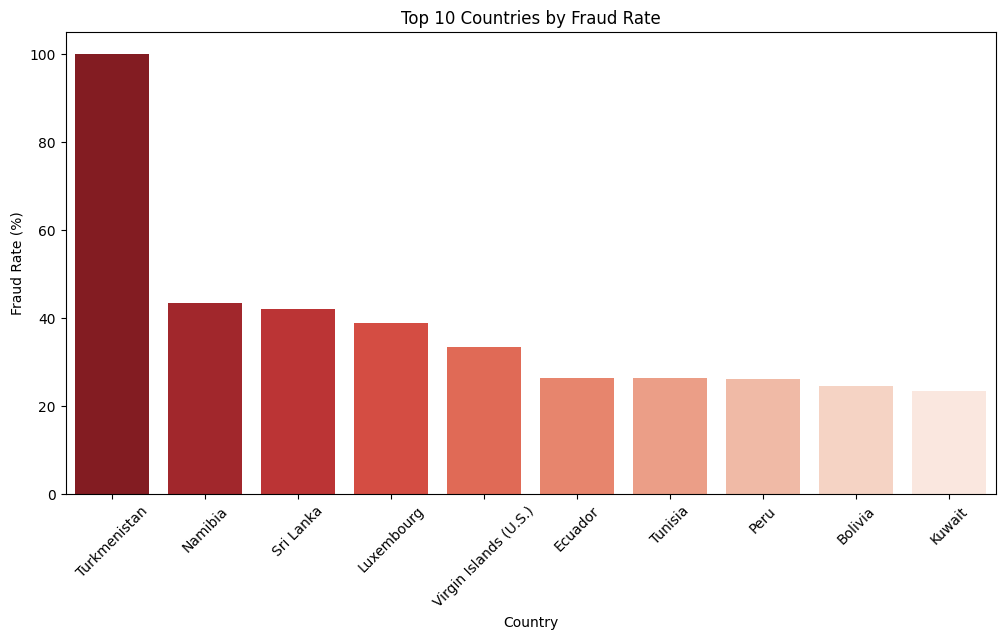

2025-02-12 11:32:47,832 - INFO - Plotted fraud rate for top 10 fraudulent countries.


In [44]:
from importlib import reload
from scripts import data_visualizer
reload(data_visualizer)
from scripts.data_visualizer import DataVisualizer
import pandas as pd

# Load the merged dataset with geolocation
merged_data = pd.read_csv('../data/preprocessed/Merged_Fraud_Data.csv')

# Analyze and visualize fraud rate by country
DataVisualizer.plot_fraud_rate_by_country(merged_data, country_column='country', class_column='class', top_n=10)


### Observations

**Turkmenistan has a 100% fraud rate:**
- Every transaction from this country is fraudulent.
- This could indicate targeted fraudulent activity or a data anomaly due to a small sample size.

**High Fraud Rates in Several Countries:**
- Namibia (43.5%), Sri Lanka (41.9%), and Luxembourg (38.9%) also show high fraud percentages.
- These countries might have weak security controls, making them attractive for fraud.

**Geographic Fraud Clusters:**
- Several South American (Ecuador, Peru, Bolivia) and Middle Eastern (Kuwait, Tunisia) countries have above 20% fraud rates.
- Indicates potential regional fraud trends that need deeper investigation.

### Recommendations

✅ **Investigate Turkmenistan:**
- Check the number of transactions—if it's a small sample, this 100% fraud rate might not be meaningful.

✅ **Analyze High-Risk Regions:**
- Study common fraud patterns in the top 10 countries.
- Look at transaction sources (SEO, Ads, Direct) and browser trends in these regions.

✅ **Feature Engineering:**
- Create a "high-risk country" flag (1 for top fraudulent countries, 0 otherwise).
- This feature could improve fraud detection models.

In [47]:
# Count the number of transactions from Turkmenistan
turkmenistan_transactions = merged_data[merged_data['country'] == 'Turkmenistan']

# Display transaction count and fraud breakdown
print("Total Transactions from Turkmenistan:", len(turkmenistan_transactions))
print(turkmenistan_transactions['class'].value_counts())  # Breakdown of fraud (1) vs non-fraud (0)


Total Transactions from Turkmenistan: 1
class
1    1
Name: count, dtype: int64


### Observation
- Only 1 transaction from Turkmenistan, and it is fraudulent.
- The 100% fraud rate is misleading because it's based on a single data point.
- This is likely a data anomaly rather than a meaningful fraud trend.

### Recommendation
- ✅ Ignore Turkmenistan from further analysis since it doesn't provide a reliable pattern.
- ✅ Focus on countries with a higher transaction count, like Namibia, Sri Lanka, and Luxembourg.

In [48]:
# Define high-risk countries (excluding Turkmenistan)
high_risk_countries = ['Namibia', 'Sri Lanka', 'Luxembourg']

# Check transaction counts and fraud rates for these countries
for country in high_risk_countries:
    country_data = merged_data[merged_data['country'] == country]
    total_transactions = len(country_data)
    fraud_counts = country_data['class'].value_counts()

    print(f"Country: {country}")
    print(f"Total Transactions: {total_transactions}")
    print(f"Fraud Breakdown:\n{fraud_counts}\n")

Country: Namibia
Total Transactions: 23
Fraud Breakdown:
class
0    13
1    10
Name: count, dtype: int64

Country: Sri Lanka
Total Transactions: 31
Fraud Breakdown:
class
0    18
1    13
Name: count, dtype: int64

Country: Luxembourg
Total Transactions: 72
Fraud Breakdown:
class
0    44
1    28
Name: count, dtype: int64



### Observations

**Namibia:**
- 23 transactions total
- 10 fraud cases → 43.5% fraud rate
- Fraud activity is significant but still based on a small number of transactions.

**Sri Lanka:**
- 31 transactions total
- 13 fraud cases → 41.9% fraud rate
- A relatively balanced mix of fraud and non-fraud cases.

**Luxembourg:**
- 72 transactions total
- 28 fraud cases → 38.9% fraud rate
- The largest sample size among high-risk countries, making this fraud trend more meaningful.

### Recommendations
- ✅ Keep Namibia, Sri Lanka, and Luxembourg as high-risk fraud countries
    - These have enough transactions to justify their fraud rates.
- ✅ Expand high-risk country list
    - Since Ecuador, Tunisia, and Peru also showed fraud rates above 25%, we should include them in further analysis.
- ✅ Create a "High-Risk Country" feature
    - Label transactions from these countries as 1 (high risk) and others as 0 (low risk).
___

### High-Risk Country Feature  
To improve fraud detection, we create a **binary feature** that flags transactions from high-fraud countries.  
This helps models identify regional fraud patterns effectively.


In [ ]:
# Define high-risk fraud countries based on previous analysis
high_risk_countries = {'Namibia', 'Sri Lanka', 'Luxembourg', 'Ecuador', 'Tunisia', 'Peru'}

# Create the high-risk country feature
merged_data = FeatureEngineer.create_high_risk_country_flag(merged_data, country_column='country', high_risk_countries=high_risk_countries)

# Save the updated dataset
merged_data.to_csv('../data/preprocessed/Merged_Fraud_Data_Updated.csv', index=False)

# Display a sample of the dataset with the new feature
print(merged_data[['country', 'high_risk_country', 'class']].head(10))

2025-02-12 11:50:17,769 - INFO - Created 'high_risk_country' feature using 6 high-fraud countries.


     country  high_risk_country  class
0  Australia                  0      0
1   Thailand                  0      0
2      China                  0      0
3      China                  0      0
4   Thailand                  0      0
5      China                  0      0
6   Thailand                  0      0
7      Japan                  0      0
8      Japan                  0      0
9      Japan                  0      0


In [51]:
# Count transactions labeled as high-risk
high_risk_count = merged_data['high_risk_country'].sum()
total_transactions = len(merged_data)

print(f"Total Transactions: {total_transactions}")
print(f"High-Risk Transactions: {high_risk_count}")
print(f"Percentage of High-Risk Transactions: {round((high_risk_count / total_transactions) * 100, 2)}%")

# Display some transactions labeled as high-risk
high_risk_samples = merged_data[merged_data['high_risk_country'] == 1].head(10)
print(high_risk_samples[['country', 'high_risk_country', 'class']])


Total Transactions: 129146
High-Risk Transactions: 469
Percentage of High-Risk Transactions: 0.36%
       country  high_risk_country  class
23858  Namibia                  1      0
23859  Namibia                  1      0
24221  Namibia                  1      0
24235  Tunisia                  1      0
24236  Tunisia                  1      0
24237  Tunisia                  1      0
24238  Tunisia                  1      0
24239  Tunisia                  1      0
24240  Tunisia                  1      0
24241  Tunisia                  1      0


### Normalization & Encoding  
To prepare the dataset for machine learning, we:  
1. **Normalize numerical features** (`purchase_value`, `age`) to ensure consistent scaling.  
2. **Encode categorical features** (`source`, `browser`) using One-Hot Encoding.


In [40]:
from importlib import reload
from scripts import feature_engineering
reload(feature_engineering)
from scripts.feature_engineering import FeatureEngineer
import pandas as pd

# Load the cleaned and merged dataset
merged_data = pd.read_csv('../data/preprocessed/Merged_Fraud_Data_Updated.csv')

# Define numerical and categorical columns
numerical_columns = ['purchase_value', 'age']
categorical_columns = ['source', 'browser']

# Apply normalization
merged_data = FeatureEngineer.normalize_numerical_features(merged_data, numerical_columns)

# Apply encoding
merged_data = FeatureEngineer.encode_categorical_features(merged_data, categorical_columns)

# Encode binary features
merged_data = FeatureEngineer.encode_binary_features(merged_data)


# Save the fully processed dataset
merged_data.to_csv('../data/preprocessed/Final_Fraud_Data.csv', index=False)

# Display sample of the transformed dataset
print(merged_data.head())


2025-02-13 12:14:35,547 - INFO - Normalized columns: ['purchase_value', 'age'].
2025-02-13 12:14:35,592 - INFO - Encoded categorical features: ['source', 'browser'].
2025-02-13 12:14:35,598 - INFO - Encoded 'sex' column as binary (M=1, F=0).


   user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29        0.262069   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28        0.041379   
2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23        0.241379   
3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14        0.317241   
4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30        0.289655   

       device_id  sex       age    ip_address  class  hour_of_day  ...  \
0  KIXYSVCHIPQBR    0  0.206897  1.677886e+07      0            3  ...   
1  PKYOWQKWGJNJI    0  0.275862  1.684205e+07      0           20  ...   
2  LVCSXLISZHVUO    1  0.189655  1.684366e+07      0           23  ...   
3  UHAUHNXXUADJE    0  0.206897  1.693873e+07      0           16  ...   
4  XPGPMOHIDRMGE    0  0.327586  1.697198e+07      0            4  ...   

     country  high_risk_country source_Ads  source_Direct  source_SEO  \
0  Australia                  0        0.0       

### Final Analysis: Normalization & Encoding Success 🎯

**Observations**

**Numerical Features Successfully Normalized**
- `purchase_value` and `age` have been scaled between 0 and 1, making them ready for modeling.

**Categorical Features Successfully Encoded**
- `source` was one-hot encoded into `source_Ads`, `source_Direct`, and `source_SEO`.
- `browser` was one-hot encoded into `browser_Chrome`, `browser_FireFox`, `browser_IE`, `browser_Opera`, and `browser_Safari`.

**binary Features Successfully Encoded**
- `sex` was encoded into `'M': 1`, `'F': 0`

**Final Dataset is Ready ✅**
- The dataset now contains both original and engineered features.
- `high_risk_country` flag has been correctly applied.